In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as op
import scipy.io as scio
import warnings
warnings.filterwarnings('ignore')

#### 1. Загрузите данные ex3data1.mat из файла.

In [2]:
data = scio.loadmat('data/Lab 3/ex3data1.mat')
X, y = data['X'], data['y'][:, 0]
X_val, y_val = data['Xval'], data['yval'][:, 0]
m = np.shape(X)[0]

#### 2. Постройте график, где по осям откладываются X и y из обучающей выборки.

In [3]:
def plotData(x, y):
    plt.plot(x, y, 'rx', LineWidth=1)
    plt.ylabel('Water volume')
    plt.xlabel('Water level')

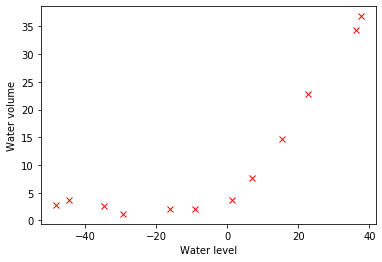

In [4]:
plotData(X, y)

#### 3. Реализуйте функцию стоимости потерь для линейной регрессии с L2-регуляризацией.

In [5]:
def computeCost(theta, X, y):
    m = len(y)
    return np.sum(np.square(X @ theta - y)) / (2 * m)

In [6]:
def Gradient(theta, X, y):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    grad = (X.T @ (X @ theta - y)) / m
    return grad.flatten()

In [7]:
def computeCostReg(theta, X, y, l):
    m = len(y)
    J = computeCost(theta, X, y)
    J += l * (theta.T @ theta - theta[0] ** 2)
    return J

In [8]:
def GradientReg(theta, X, y, l):
    m, n = X.shape
    theta = theta.reshape(n,)
    grad = Gradient(theta, X, y)
    grad += l / m * theta
    grad[0] -= l / m * theta[0]
    return grad

#### 5. Постройте модель линейной регрессии с коэффициентом регуляризации 0 и постройте график полученной функции совместно с графиком из пункта 2. Почему регуляризация в данном случае не сработает?

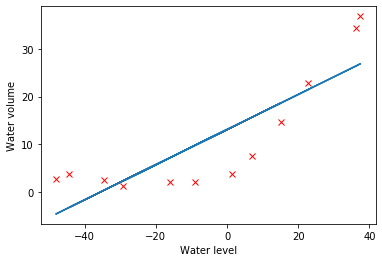

In [9]:
X = np.concatenate((np.ones((m, 1), dtype='float'), data['X']), axis=1)
initial_theta = np.zeros((X.shape[1], 1), dtype='float')

res = op.minimize(fun=computeCostReg,
                  x0=initial_theta,
                  args=(X, y, 0),
                  method='BFGS',
                  jac=GradientReg)

plotData(X[:, 1], y)
plt.plot(X[:, 1], X @ res.x, '-') # Plot the linear fit
plt.show()

Регуляризация в данном случае не работает т.к. мы используем полином первой степени.

#### 6. Постройте график процесса обучения (learning curves) для обучающей и валидационной выборки. По оси абсцисс откладывается число элементов из обучающей выборки, а по оси ординат - ошибка (значение функции потерь) для обучающей выборки (первая кривая) и валидационной выборки (вторая кривая). Какой вывод можно сделать по построенному графику?

In [10]:
def gradientDescent(X, y, X_val, y_val, theta, alpha, num_iters):
    m = len(y)
    y = y.reshape(m, 1)
    J_history = np.zeros((num_iters, 1), dtype='int')
    J_val_history = np.zeros((num_iters, 1), dtype='int')
    
    for itera in range(num_iters):
        temp1 = sum(np.dot(X, theta) - y) / m
        temp2 = np.dot((np.dot(X, theta) - y).T, X[:, 1]) / m
        theta[0] -= alpha * temp1
        theta[1] -= alpha * temp2
        J_history[itera] = computeCost(theta, X, y)
        J_val_history[itera] = computeCost(theta, X_val, y_val)
        
    return theta, J_history, J_val_history

In [11]:
def featureNormalize(X):
    X_norm = deepcopy(X)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    m = np.shape(X)[0]
    for i in range(m):
        X_norm[i] = np.divide(X_norm[i] - mu, sigma)
    return X_norm, mu, sigma

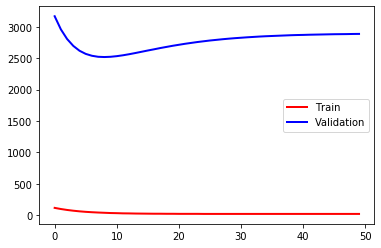

In [12]:
num_iters = 50

# Init Theta and Run Gradient Descent
theta = np.zeros((2, 1), dtype='float')
X_norm, _, _ = featureNormalize(data['X'])
X_norm = np.concatenate([np.ones((np.shape(X_norm)[0], 1), dtype='float'), X_norm], axis=1)
X_val_norm, _, _ = featureNormalize(data['Xval'])
X_val_norm = np.concatenate([np.ones((np.shape(X_val_norm)[0], 1), dtype='float'), X_val_norm], axis=1)

[_, J_history, J_val_history] = gradientDescent(X_norm, y, X_val_norm, y_val, theta, 0.1, num_iters)

plt.plot(range(num_iters), J_history, '-r', LineWidth=2)
plt.plot(range(num_iters), J_val_history, '-b', LineWidth=2)
plt.legend(['Train', 'Validation'])

По графику можно сделать вывод, что после некоторого момента обучения ошибка на валидационной выборке начинает возростать.
Это связано с тем, что наша модель начинает переобучаться.

#### 7. Реализуйте функцию добавления p - 1 новых признаков в обучающую выборку (X2, X3, X4, …, Xp).

In [13]:
def mapFeature(x, p):
    out = np.ones((x.shape[0], 1))
    
    for i in range(1, p + 1):
        newColumn = x ** i
        out = np.column_stack((out, newColumn))
    return out

#### 8. Поскольку в данной задаче будет использован полином высокой степени, то необходимо перед обучением произвести нормализацию признаков.

In [14]:
X_norm, _, _ = featureNormalize(data['X'])

#### 9. Обучите модель с коэффициентом регуляризации 0 и p = 8.

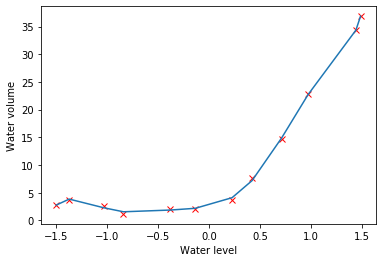

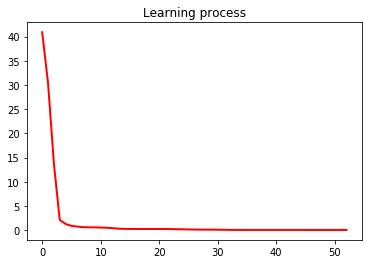

In [15]:
X_norm, _, _ = featureNormalize(data['X'])
X, y = X_norm, data['y'][:, 0]
X_y = np.concatenate((X, y.reshape(-1, 1)), axis=1)
X_y = X_y[X_y[:, 0].argsort()]
X, y = (X_y[:, 0], X_y[:, 1])
X = X.reshape(-1, 1)

X = mapFeature(X, 8)
# X = np.concatenate((np.ones((m, 1), dtype='float'), X), axis=1)
initial_theta = np.zeros((X.shape[1], 1), dtype='float')

theta_history = []
res = op.minimize(fun=computeCostReg,
                  x0=initial_theta,
                  args=(X, y, 0),
                  method='BFGS',
                  jac=GradientReg,
                  callback=lambda X_i: theta_history.append(X_i))

J_history = list(map(lambda theta: computeCost(theta, X, y), theta_history))
plotData(X[:, 1], y)
plt.plot(X[:, 1], X @ res.x, '-') # Plot the linear fit
plt.show()

plt.plot(range(len(J_history)), J_history, '-r', LineWidth=2)
plt.title('Learning process')
plt.show()

По графикам можно сделать вывод, что модель переобучилась.

#### 11. Постройте графики из пункта 10 для моделей с коэффициентами регуляризации 1 и 100. Какие выводы можно сделать?

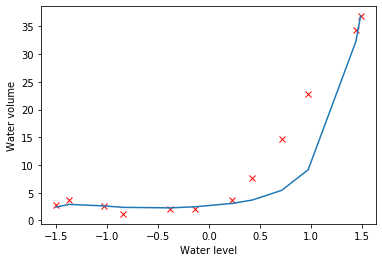

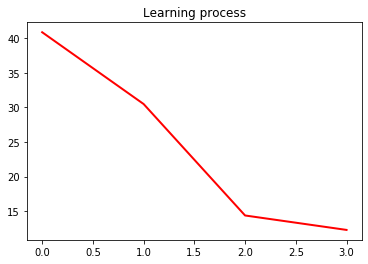

In [16]:
theta_history = []
res = op.minimize(fun=computeCostReg,
                  x0=initial_theta,
                  args=(X, y, 1),
                  method='BFGS',
                  jac=GradientReg,
                  callback=lambda X_i: theta_history.append(X_i))

J_history = list(map(lambda theta: computeCost(theta, X, y), theta_history))
plotData(X[:, 1], y)
plt.plot(X[:, 1], X @ res.x, '-') # Plot the linear fit
plt.show()

plt.plot(range(len(J_history)), J_history, '-r', LineWidth=2)
plt.title('Learning process')
plt.show()

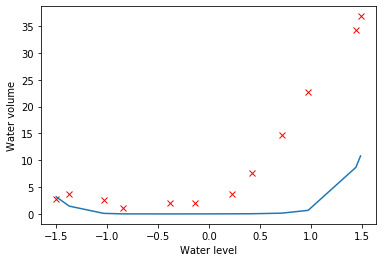

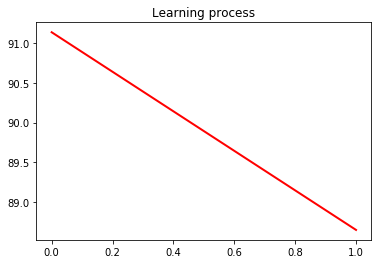

In [17]:
theta_history = []
res = op.minimize(fun=computeCostReg,
                  x0=initial_theta,
                  args=(X, y, 100),
                  method='BFGS',
                  jac=GradientReg,
                  callback=lambda X_i: theta_history.append(X_i))

J_history = list(map(lambda theta: computeCost(theta, X, y), theta_history))
plotData(X[:, 1], y)
plt.plot(X[:, 1], X @ res.x, '-') # Plot the linear fit
plt.show()

plt.plot(range(len(J_history)), J_history, '-r', LineWidth=2)
plt.title('Learning process')
plt.show()

Из графиков выше можно сделать вывод, что при увеличении коэфициента регуляризации, график становится менее точным,
из-за того что "съедаются" более высокие порядки полинома.

#### 12. С помощью валидационной выборки подберите коэффиент регуляризации, который позволяет достичь наименьшей ошибки. Процесс подбора отразите с помощью графика (графиков).

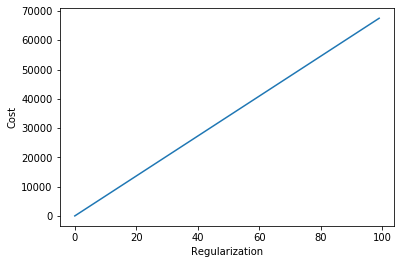

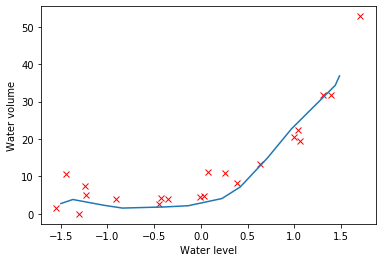

In [19]:
res = op.minimize(fun=computeCostReg,
                  x0=initial_theta,
                  args=(X, y, 0),
                  method='BFGS',
                  jac=GradientReg)

X_val_norm, _, _ = featureNormalize(data['Xval'])
X_val, y_val = X_val_norm, data['yval'][:, 0]
X_y = np.concatenate((X_val, y_val.reshape(-1, 1)), axis=1)
X_y = X_y[X_y[:, 0].argsort()]
X_val, y_val = (X_y[:, 0], X_y[:, 1])
X_val = X_val.reshape(-1, 1)
X_val = mapFeature(X_val, 8)

J_history = []
for reg_param in range(100):
    J_history.append(computeCostReg(res.x, X_val, y_val, reg_param))
    
plt.plot(range(len(J_history)), J_history, '-')
plt.ylabel('Cost')
plt.xlabel('Regularization')
plt.show()

plotData(X_val[:, 1], y_val)
plt.plot(X[:, 1], X @ res.x, '-') # Plot the linear fit
plt.show()

Первый график выглядит довольно подозрительно и показывает отношение коэфициента регулярзации к значению функции потерь.
Притом модель(параметр theta) бралась из обучающей выборки, а значения (x, y) из валидационной. Тем не менее, по нему можно предположить,
что обучение со значением регуляризации 0 (которые ранее мы обозначили как переобучение) дает хорошие показатели на валидационной выборке.

#### 13. Вычислите ошибку (потерю) на контрольной выборке.

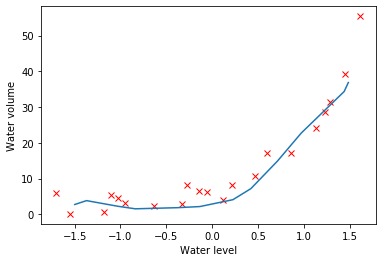

Cost at theta in test:  7.940286047868064


In [25]:
X_test_norm, _, _ = featureNormalize(data['Xtest'])
X_test, y_test = X_test_norm, data['ytest'][:, 0]
X_y = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
X_y = X_y[X_y[:, 0].argsort()]
X_test, y_test = (X_y[:, 0], X_y[:, 1])
X_test = X_test.reshape(-1, 1)
X_test = mapFeature(X_test, 8)

plotData(X_test[:, 1], y_test)
plt.plot(X[:, 1], X @ res.x, '-')
plt.show()

print('Cost at theta in test: ', computeCostReg(res.x, X_test, y_test, 0))